In [100]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score , precision_recall_fscore_support

In [73]:
data = pd.read_csv('heart.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [74]:
print(data.shape)
print(data.info())
print(data.describe())

(299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
   

In [75]:
## removing null values
print(data.isnull().sum().sum())
data.fillna(data.mean , inplace=True)
data.dropna(inplace=True)

0


## Exploratery Data analysis

In [76]:
deaths = len(data['DEATH_EVENT'][data.DEATH_EVENT == 1])
lives = len(data['DEATH_EVENT'][data.DEATH_EVENT == 0])
print(deaths , lives)

96 203


([<matplotlib.patches.Wedge at 0x1f7863241f0>,
 [Text(0.6395819587327112, 1.0153496531065684, 'Deaths'),
  Text(-0.5862835493135531, -0.9307371271225311, 'Lives')])

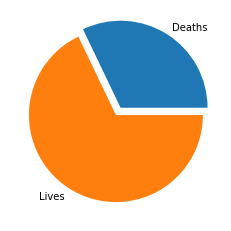

In [77]:
plt.pie([deaths , lives] , labels=["Deaths" , "Lives"] , explode=[0.1,0.0])

In [78]:
aged_live = len(data["DEATH_EVENT"][data.age>=50][data.DEATH_EVENT==0])
aged_death = len(data["DEATH_EVENT"][data.age>=50][data.DEATH_EVENT==1])
print("Living person who have age greater then 50: ",aged_live)
print("Dead person who have age greater then 50: ",aged_death)

Living person who have age greater then 50:  167
Dead person who have age greater then 50:  85


([<matplotlib.patches.Wedge at 0x1f786321940>,
 [Text(-0.5380814270777221, 0.9594104324187861, 'Live with age>=50'),
  Text(0.5380813372512318, -0.9594104827976013, 'Dead with age>=50')])

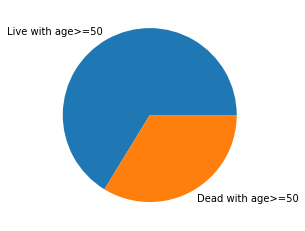

In [79]:
plt.pie([aged_live,aged_death] , labels=["Live with age>=50" , "Dead with age>=50"])

In [80]:
male_live = len(data["DEATH_EVENT"][data.sex==1][data.DEATH_EVENT==0])#sex=1 -> male
male_death = len(data["DEATH_EVENT"][data.sex==1][data.DEATH_EVENT==1])
print("Total noumber of males: " , len(data["sex"][data.sex==1]))
print("Male living: " , male_live)
print("Male deaths: " , male_death)

Total noumber of males:  194
Male living:  132
Male deaths:  62


<AxesSubplot:>

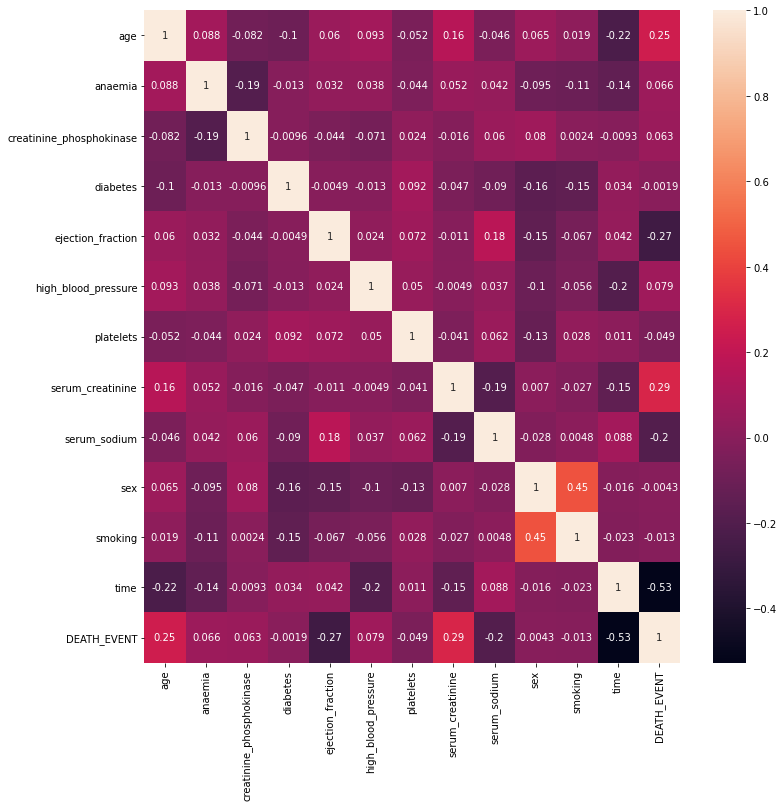

In [81]:
corr = data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corr , annot=True)

## Model Building

In [89]:
X = data.drop("DEATH_EVENT" , axis=1)
Y = data["DEATH_EVENT"]

X_train  , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3 , random_state=0)
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(209, 12) (90, 12) (209,) (90,)


In [93]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [94]:
model.score(X_test , Y_test)

0.7888888888888889

In [95]:
accuracy_score(Y_test,Y_pred)

0.7888888888888889

In [99]:
precision_recall_fscore_support(Y_test, Y_pred)

(array([0.79452055, 0.76470588]),
 array([0.93548387, 0.46428571]),
 array([0.85925926, 0.57777778]),
 array([62, 28], dtype=int64))